In [4]:
import pandas as pd

In [5]:
caminho = r"C:\Users\conta\Documents\ENS\ENS410064\dados\VictorSilvestre_Atividade01.csv"
df = pd.read_csv(caminho, encoding='latin1')
df.head()


,image_id,owner_id,title,datetaken,latitude,longitude,classification_score,latin_name,common_name_english,image_license_code,image_license,url_large_image,url_small_image,image_information_link
0,14692142249,87453322@N00,"Translucent Dying. Verbascum blattaria alba, W...",10/08/2014,51.439194,-0.053002,0.856519,Verbascum blattaria,Moth mullein,0,All Rights Reserved,https://live.staticflickr.com/3922/14692142249...,https://live.staticflickr.com/3922/14692142249...,https://www.flickr.com/photos/87453322@N00/146...
1,7928541686,21041564@N04,IMG_6825,23/07/2012,51.439333,-0.188000,0.393210,Leucanthemum vulgare,Grande marguerite,0,All Rights Reserved,https://live.staticflickr.com/8451/7928541686_...,https://live.staticflickr.com/8451/7928541686_...,https://www.flickr.com/photos/21041564@N04/792...
2,7548820752,24329363@N00,"Howard Carter, discoverer of Tutankhamen's tomb.",26/06/2012,51.439593,-0.239883,0.215483,Sarracenia purpurea,Common pitcherplant,0,All Rights Reserved,https://live.staticflickr.com/7264/7548820752_...,https://live.staticflickr.com/7264/7548820752_...,https://www.flickr.com/photos/24329363@N00/754...
3,7767667730,34427470616@N01,Wild flowers,12/08/2012,51.439871,-0.205736,0.452035,Clarkia amoena,Farewell-to-spring,2,Attribution-NonCommercial License,https://live.staticflickr.com/8448/7767667730_...,https://live.staticflickr.com/8448/7767667730_...,https://www.flickr.com/photos/34427470616@N01/...
4,6272732216,41079902@N07,crocus,09/10/2011,51.439995,-0.299361,0.121861,Calochortus minimus,Sierra mariposa lily,0,All Rights Reserved,https://live.staticflickr.com/6113/6272732216_...,https://live.staticflickr.com/6113/6272732216_...,https://www.flickr.com/photos/41079902@N07/627...


In [6]:
# Contagem de espécies únicas
num_species = df['latin_name'].nunique()

# Lista de espécies únicas
unique_species = df['latin_name'].unique()

print(f"Número de espécies únicas: {num_species}")
print("Lista das espécies:")
print(unique_species)


Número de espécies únicas: 2523
Lista das espécies:
['Verbascum blattaria' 'Leucanthemum vulgare' 'Sarracenia purpurea' ...
 'Crupina crupinastrum' 'Pedicularis gyroflexa' 'Picnomon acarna']


In [7]:
species_counts = df['latin_name'].value_counts()
print(species_counts)


latin_name
Rosa chinensis               1271
Papaver rhoeas                939
Acer platanoides              866
Tulipa gesneriana             602
Narcissus pseudonarcissus     581
                             ... 
Erica verticillata              1
Osmunda claytoniana             1
Phlox divaricata                1
Hymenocallis liriosme           1
Picnomon acarna                 1
Name: count, Length: 2523, dtype: int64


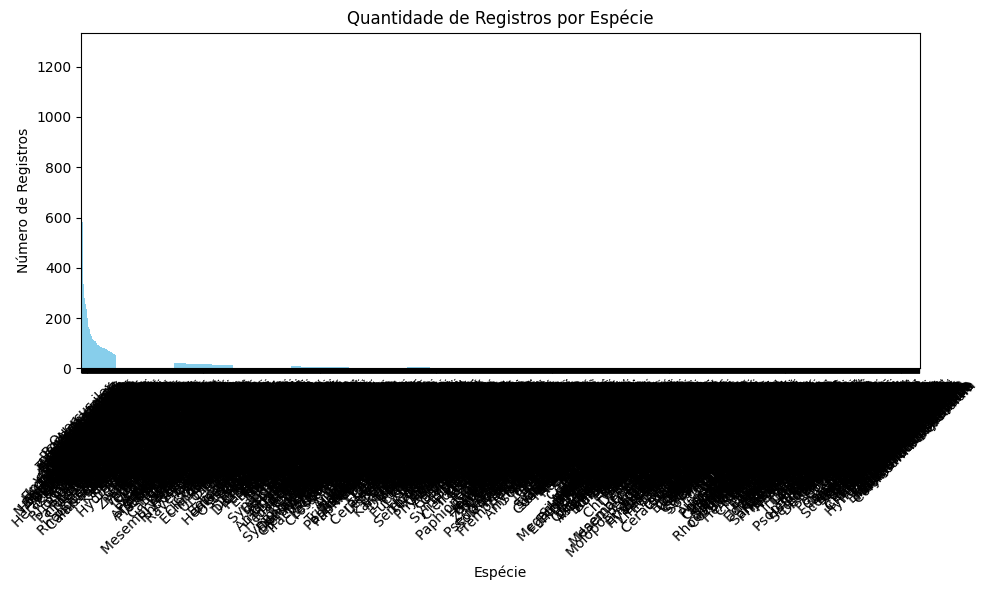

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Quantidade de registros para cada espécie
species_counts = df['latin_name'].value_counts()

# Plotar o gráfico
plt.figure(figsize=(10,6))  # Ajustar o tamanho conforme necessário
species_counts.plot(kind='bar', color='skyblue')

# Título e labels
plt.title('Quantidade de Registros por Espécie')
plt.xlabel('Espécie')
plt.ylabel('Número de Registros')
plt.xticks(rotation=45)  # Rodar os nomes das espécies para melhor visualização

# Mostrar o gráfico
plt.tight_layout()
plt.show()


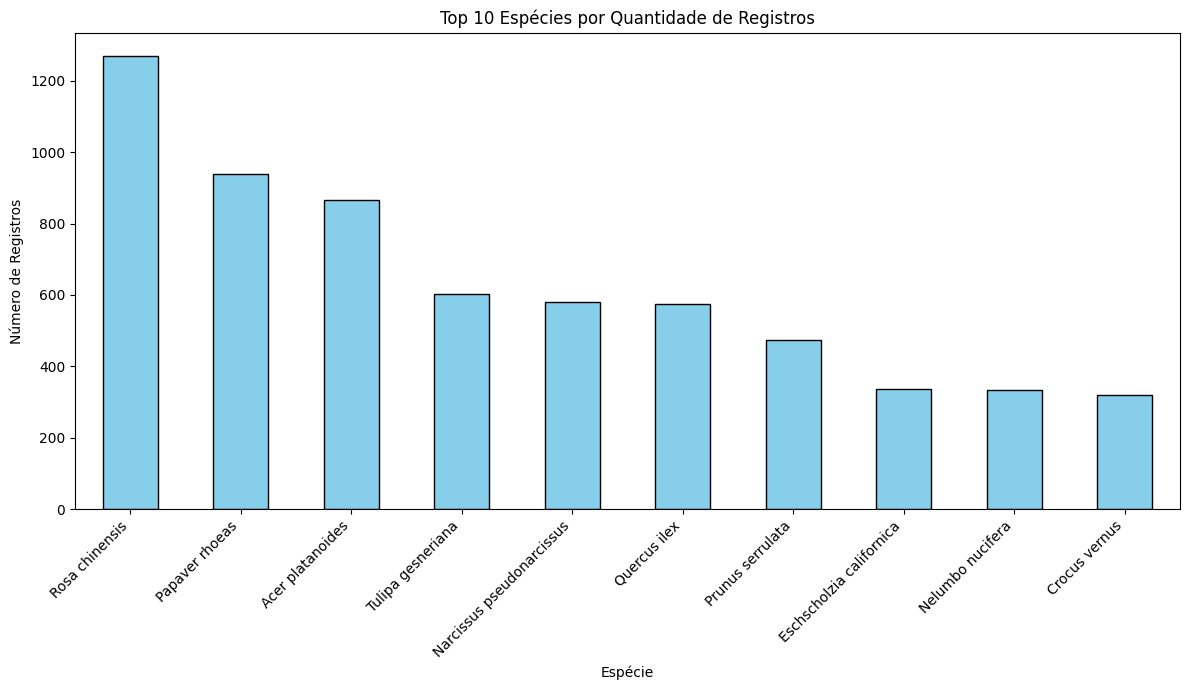

In [9]:
import pandas as pd
import matplotlib.pyplot as plt



# 10 espécies com mais registros
top_10_species = df['latin_name'].value_counts().head(10)

# Plotar o gráfico
plt.figure(figsize=(12, 7))
top_10_species.plot(kind='bar', color='skyblue', edgecolor='black')

# Título e labels
plt.title('Top 10 Espécies por Quantidade de Registros')
plt.xlabel('Espécie')
plt.ylabel('Número de Registros')
plt.xticks(rotation=45, ha='right')  # Rodar os nomes das espécies para melhor visualização

# Mostrar o gráfico
plt.tight_layout()
plt.show()


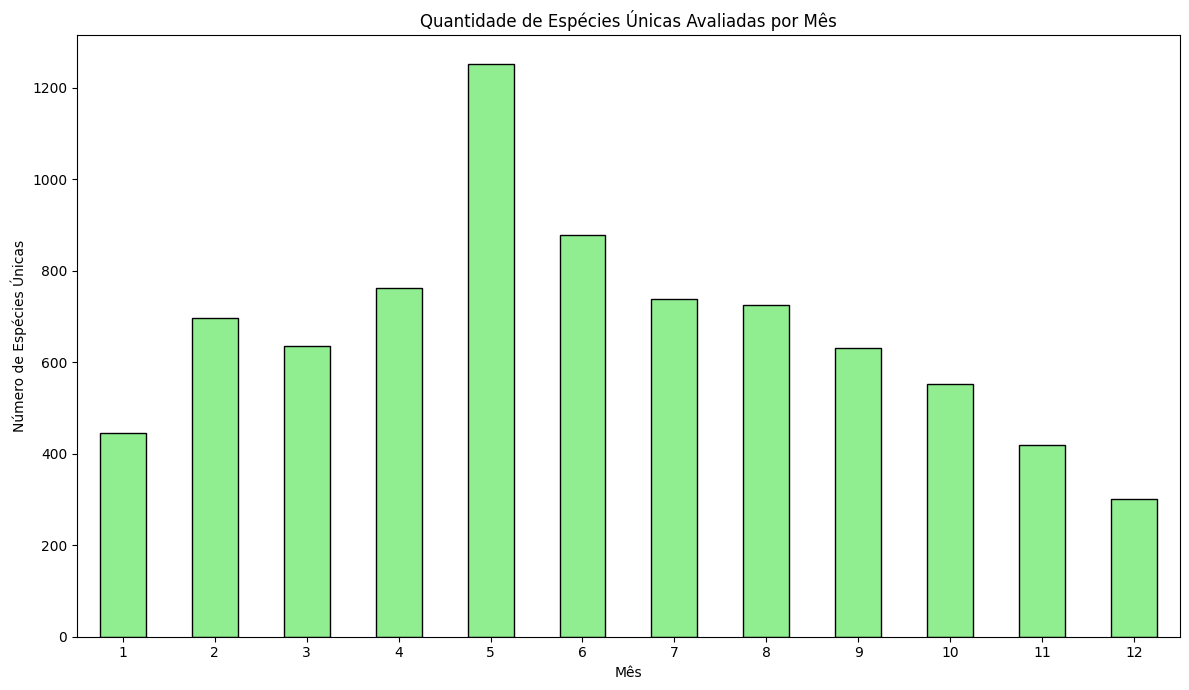

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Extraia o mês e crie uma nova coluna 'month'
df['month'] = df['datetaken'].dt.month

# Agrupe por mês e conte as espécies únicas
species_per_month = df.groupby('month')['latin_name'].nunique()

# Plotar o gráfico
plt.figure(figsize=(12, 7))
species_per_month.plot(kind='bar', color='lightgreen', edgecolor='black')

# Título e labels
plt.title('Quantidade de Espécies Únicas Avaliadas por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Espécies Únicas')
plt.xticks(rotation=0)
plt.tight_layout()

# Mostrar o gráfico
plt.show()


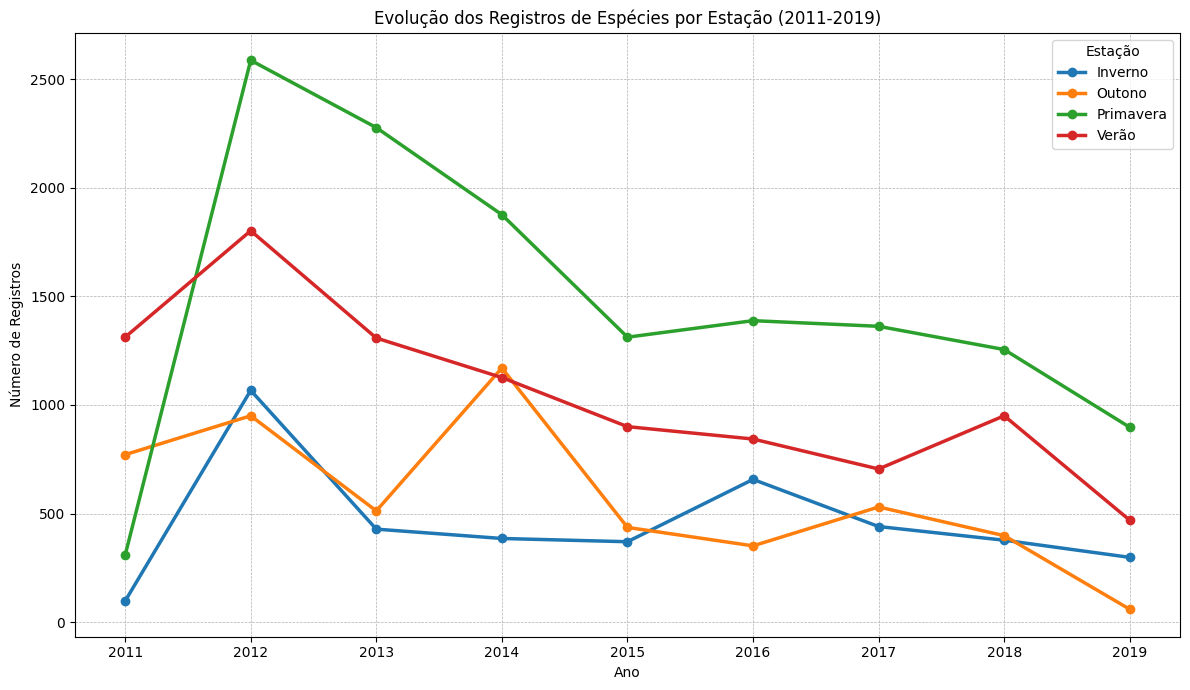

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que a coluna 'datetaken' já foi convertida para datetime

# Filtrar registros de 2011 a 2019
df = df[df['datetaken'].dt.year.between(2011, 2019)]

# Função para classificar a estação do ano
def season(month):
    if month in [3, 4, 5]:
        return 'Primavera'
    elif month in [6, 7, 8]:
        return 'Verão'
    elif month in [9, 10, 11]:
        return 'Outono'
    else:
        return 'Inverno'

# Aplicar a função para criar uma coluna 'season'
df['season'] = df['datetaken'].dt.month.apply(season)

# Agrupar por ano e estação e contar os registros
grouped = df.groupby([df['datetaken'].dt.year, 'season'])['latin_name'].count().unstack()

# Plotar a evolução dos registros
grouped.plot(figsize=(12, 7), marker='o', linewidth=2.5)

# Título, labels e legenda
plt.title('Evolução dos Registros de Espécies por Estação (2011-2019)')
plt.xlabel('Ano')
plt.ylabel('Número de Registros')
plt.legend(title='Estação')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Mostrar o gráfico
plt.show()


In [7]:
df

,image_id,owner_id,title,datetaken,latitude,longitude,classification_score,latin_name,common_name_english,image_license_code,image_license,url_large_image,url_small_image,image_information_link
0,14692142249,87453322@N00,"Translucent Dying. Verbascum blattaria alba, W...",10/08/2014,51.439194,-0.053002,0.856519,Verbascum blattaria,Moth mullein,0,All Rights Reserved,https://live.staticflickr.com/3922/14692142249...,https://live.staticflickr.com/3922/14692142249...,https://www.flickr.com/photos/87453322@N00/146...
1,7928541686,21041564@N04,IMG_6825,23/07/2012,51.439333,-0.188000,0.393210,Leucanthemum vulgare,Grande marguerite,0,All Rights Reserved,https://live.staticflickr.com/8451/7928541686_...,https://live.staticflickr.com/8451/7928541686_...,https://www.flickr.com/photos/21041564@N04/792...
2,7548820752,24329363@N00,"Howard Carter, discoverer of Tutankhamen's tomb.",26/06/2012,51.439593,-0.239883,0.215483,Sarracenia purpurea,Common pitcherplant,0,All Rights Reserved,https://live.staticflickr.com/7264/7548820752_...,https://live.staticflickr.com/7264/7548820752_...,https://www.flickr.com/photos/24329363@N00/754...
3,7767667730,34427470616@N01,Wild flowers,12/08/2012,51.439871,-0.205736,0.452035,Clarkia amoena,Farewell-to-spring,2,Attribution-NonCommercial License,https://live.staticflickr.com/8448/7767667730_...,https://live.staticflickr.com/8448/7767667730_...,https://www.flickr.com/photos/34427470616@N01/...
4,6272732216,41079902@N07,crocus,09/10/2011,51.439995,-0.299361,0.121861,Calochortus minimus,Sierra mariposa lily,0,All Rights Reserved,https://live.staticflickr.com/6113/6272732216_...,https://live.staticflickr.com/6113/6272732216_...,https://www.flickr.com/photos/41079902@N07/627...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31968,40764858573,47046427@N03,Rowan flowers in the Paddock Car Park,26/04/2019,51.590163,-0.132603,0.972248,Sorbus aucuparia,Quickbeam,0,All Rights Reserved,https://live.staticflickr.com/65535/4076485857...,https://live.staticflickr.com/65535/4076485857...,https://www.flickr.com/photos/47046427@N03/407...
31969,48023808822,47046427@N03,Salsify flower in the Paddock Car Park,05/06/2019,51.590197,-0.133745,0.965580,Tragopogon porrifolius,Vegetable-oyster,0,All Rights Reserved,https://live.staticflickr.com/65535/4802380882...,https://live.staticflickr.com/65535/4802380882...,https://www.flickr.com/photos/47046427@N03/480...
31970,30556591538,90865052@N00,Walthamstow Town Hall,01/09/2018,51.590202,-0.013184,0.050069,Canna indica,African arrowroot,0,All Rights Reserved,https://live.staticflickr.com/1890/30556591538...,https://live.staticflickr.com/1890/30556591538...,https://www.flickr.com/photos/90865052@N00/305...
31971,40764853293,47046427@N03,Borage by the Paddock Car Park,26/04/2019,51.590213,-0.132892,0.967724,Borago officinalis,Beebread,0,All Rights Reserved,https://live.staticflickr.com/65535/4076485329...,https://live.staticflickr.com/65535/4076485329...,https://www.flickr.com/photos/47046427@N03/407...


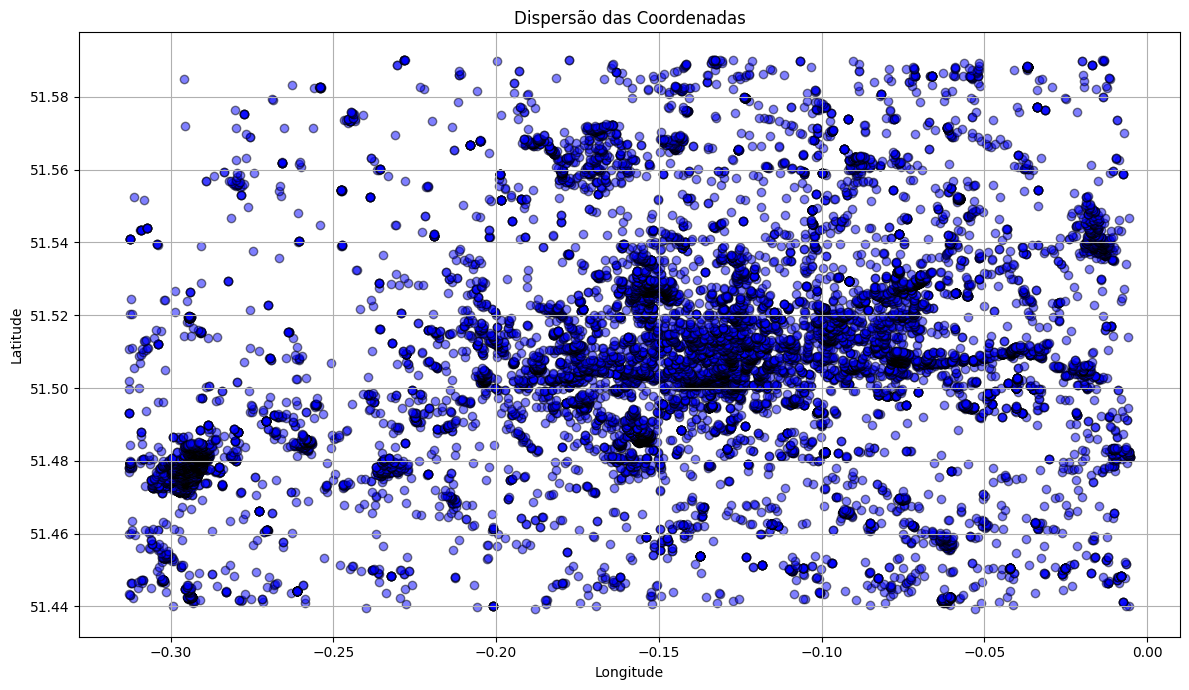

In [8]:
import matplotlib.pyplot as plt

# Supondo que df contém seus dados

# Plotar as coordenadas
plt.figure(figsize=(12,7))
plt.scatter(df['longitude'], df['latitude'], c='blue', alpha=0.5, edgecolor='black')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Dispersão das Coordenadas')
plt.grid(True)
plt.tight_layout()
plt.show()


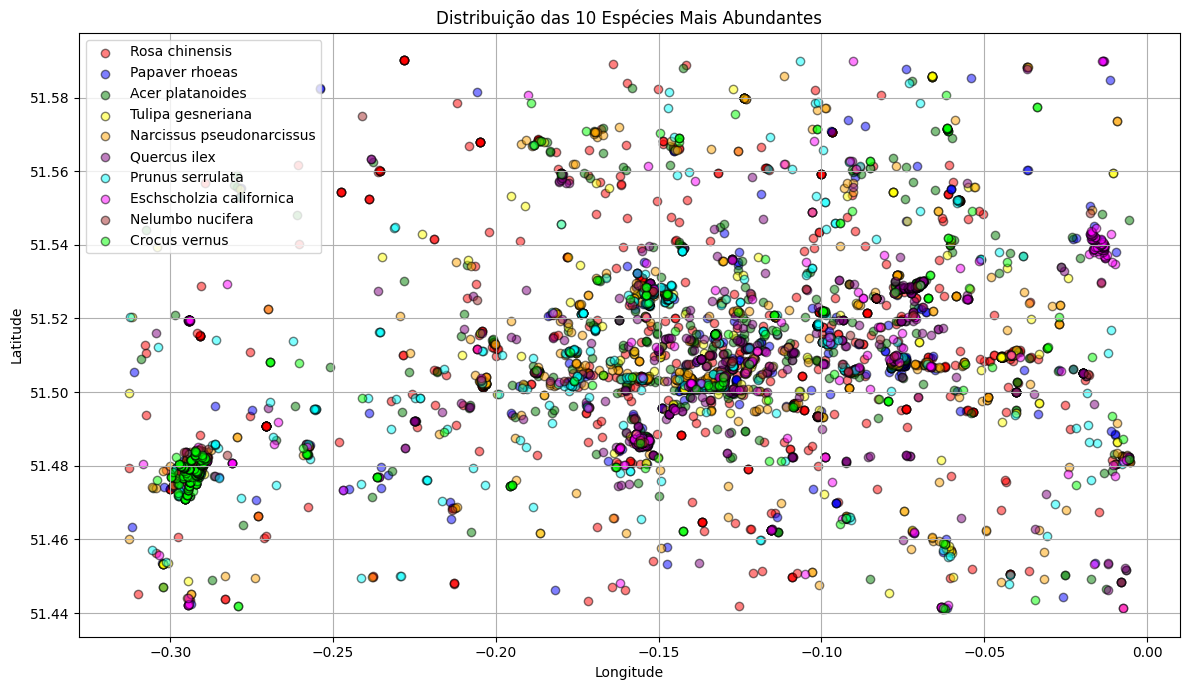

In [9]:
import matplotlib.pyplot as plt

# Determinar as 10 espécies mais abundantes
top_10_species = df['latin_name'].value_counts().head(10).index.tolist()

# Filtrar o DataFrame para conter apenas registros dessas espécies
filtered_df = df[df['latin_name'].isin(top_10_species)]

# Cores - supondo que temos um conjunto de 10 cores. Se precisar de mais, ajuste este conjunto.
colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'cyan', 'magenta', 'brown', 'lime']

# Plotar o gráfico de dispersão para cada espécie
plt.figure(figsize=(12, 7))

for species, color in zip(top_10_species, colors):
    subset = filtered_df[filtered_df['latin_name'] == species]
    plt.scatter(subset['longitude'], subset['latitude'], c=color, label=species, alpha=0.5, edgecolor='black')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribuição das 10 Espécies Mais Abundantes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
import geopandas as gpd

from geopandas import GeoDataFrame
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]

gdf = GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)

C:\Users\conta\AppData\Local\Temp\ipykernel_19120\4108605781.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

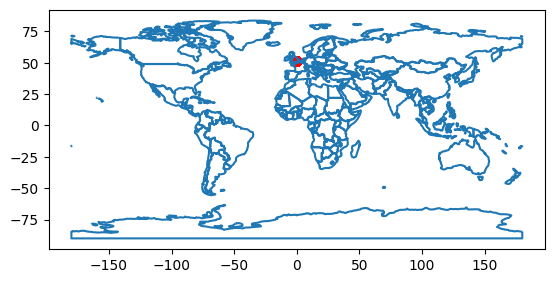

In [20]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig,ax=plt.subplots()
gdf.plot(ax=ax,color='red')
world.boundary.plot(ax=ax)

In [21]:
# 1. Calcule a contagem de cada espécie.
species_counts = df['latin_name'].value_counts()

# 2. Selecione as 10 espécies mais frequentes.
top_10_species_counts = species_counts.head(10)

# 3. Calcule a probabilidade de ocorrência de cada uma das 10 principais espécies.
total_records = len(df)
top_10_probabilities = top_10_species_counts / total_records

print(top_10_probabilities)


latin_name
Rosa chinensis               0.039752
Papaver rhoeas               0.029369
Acer platanoides             0.027085
Tulipa gesneriana            0.018828
Narcissus pseudonarcissus    0.018172
Quercus ilex                 0.017984
Prunus serrulata             0.014825
Eschscholzia californica     0.010509
Nelumbo nucifera             0.010478
Crocus vernus                0.010008
Name: count, dtype: float64


In [24]:
# 1. Calcule a contagem de cada espécie.
species_counts = df['latin_name'].value_counts()

# 2. Selecione as 10 espécies mais frequentes.
top_10_species_counts = species_counts.head(10)

# 3. Calcule a probabilidade (em percentual) de ocorrência de cada uma das 10 principais espécies.
total_records = len(df)
top_10_percentual = (top_10_species_counts / total_records) * 100



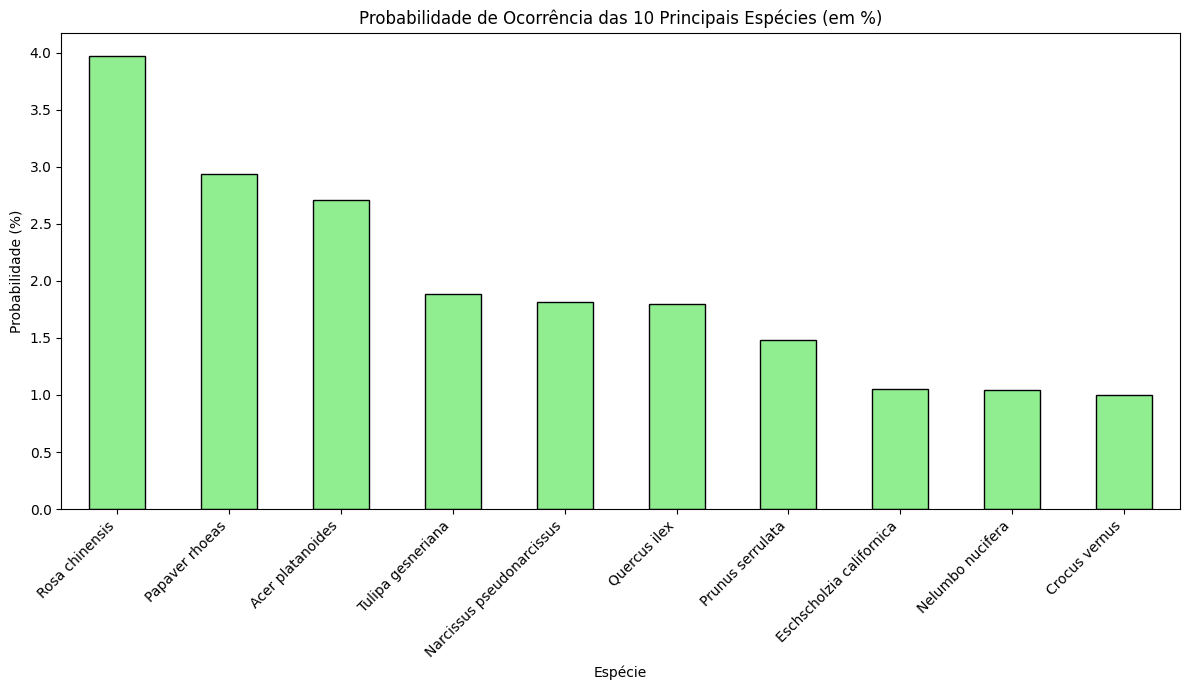

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
top_10_percentual.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Probabilidade de Ocorrência das 10 Principais Espécies (em %)')
plt.ylabel('Probabilidade (%)')
plt.xlabel('Espécie')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\conta\AppData\Local\Temp\ipykernel_19120\3692153617.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


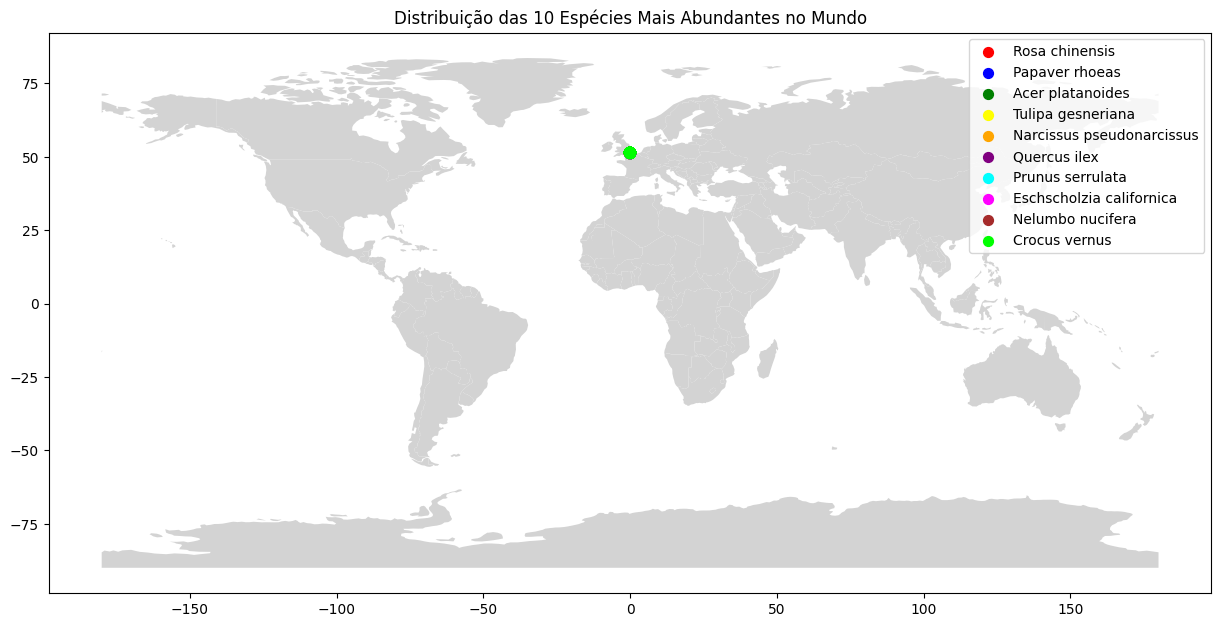

In [26]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Converta o DataFrame em GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Crie o mapa do mundo
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plote o mapa
fig, ax = plt.subplots(figsize=(15, 15))
world.plot(ax=ax, color='lightgray')

# Plote cada espécie
for species, color in zip(top_10_species, colors):
    gdf[gdf['latin_name'] == species].plot(ax=ax, markersize=50, color=color, label=species)

plt.title('Distribuição das 10 Espécies Mais Abundantes no Mundo')
plt.legend()
plt.show()


In [30]:
import folium

# Crie um mapa base. Inicializamos no Reino Unido, mas você pode ajustar isso.
m = folium.Map(location=[54.5, -4], zoom_start=5)

# Itere sobre cada registro e adicione ao mapa
for idx, row in df.iterrows():
    if row['latin_name'] in df:
        color = colors[df.index(row['latin_name'])]  # pegue a cor associada à espécie
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=5,
            popup=row['latin_name'],
            color=color,
            fill=True,
            fill_opacity=0.7
        ).add_to(m)

m
